# Introduction to Regression with Neural Networks in TensorFlow

Predicting a numerical variable based on some other combination of vairables.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [2]:
## Create data to view and fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

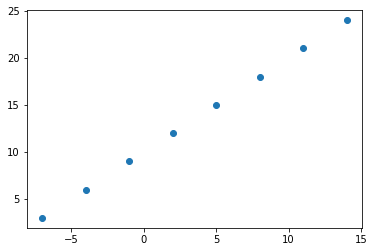

In [3]:
# create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

#visualize
plt.scatter(X, y)

In [4]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [5]:
# function we want our nn to learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### input and output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [11]:
X[0].ndim

0

In [12]:
X[0], y[0]

(-7.0, 3.0)

In [13]:
# Turn our numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

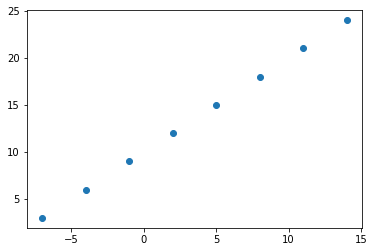

In [20]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as weel as the hidden layers of a deep learning model
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model - letting a model try to find patterns between X & y (features and labels)

In [22]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # , input_shape = (1,)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae -> mean absolute error
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"]) # SGD -> stochastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 668ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [21]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
# # Optionally, the first layer can receive an 'input_shape' argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape = (16,)))
# # After, we do automatic shape inference
# model.add(tf.keras.layers.Dense(4))

In [23]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# try and make a prediction using our model
model.predict([17.])

1/1 [==============================] - 0s 121ms/step


array([[12.716021]], dtype=float32)

In [18]:
# Another version of creating a model

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))


## STEPS IN IMPROVING A MODEL

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here, we might add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [29]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae, 
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 759ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 

In [30]:
model.predict([17.])

1/1 [==============================] - 0s 101ms/step


array([[29.739855]], dtype=float32)

In [31]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## PART 3

In [32]:
# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 943ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 7ms/st

In [33]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [34]:
model.predict([17.])

1/1 [==============================] - 0s 124ms/step


array([[31.223137]], dtype=float32)

In [35]:
# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 657ms/step - loss: 12.1456 - mae: 12.1456
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5538 - mae: 11.5538
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9405 - mae: 10.9405
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3009 - mae: 10.3009
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6325 - mae: 9.6325
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9314 - mae: 8.9314
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1937 - mae: 8.1937
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3997 - mae: 7.3997
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5612 - mae: 6.5612
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 5.6630 - mae: 5.6630
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - los

In [36]:
model.predict([17.])

1/1 [==============================] - 0s 124ms/step


array([[32.45491]], dtype=float32)

In [37]:
# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 729ms/step - loss: 13.4562 - mae: 13.4562
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9006 - mae: 12.9006
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.3433 - mae: 12.3433
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7814 - mae: 11.7814
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2120 - mae: 11.2120
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6322 - mae: 10.6322
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0390 - mae: 10.0390
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4293 - mae: 9.4293
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8000 - mae: 8.8000
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1478 - mae: 8.1478
Epoch 11/100
1/1 [==============================] - 0s 8ms/s

In [38]:
model.predict([17.])

1/1 [==============================] - 0s 138ms/step


array([[29.716785]], dtype=float32)

In [44]:
# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 823ms/step - loss: 13.2573 - mae: 13.2573
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5838 - mae: 12.5838
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9128 - mae: 11.9128
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2431 - mae: 11.2431
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5732 - mae: 10.5732
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9004 - mae: 9.9004
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.2220 - mae: 9.2220
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5346 - mae: 8.5346
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8344 - mae: 7.8344
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1177 - mae: 7.1177
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - 

In [45]:
model.predict([17.])

1/1 [==============================] - 0s 162ms/step


array([[27.48981]], dtype=float32)

### The learning rate is the most important hyperparameter of many different neural networks. 

## EVALUATING A TF MODEL PT1

In practice, a typical worflow you'll go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - how does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [46]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [47]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

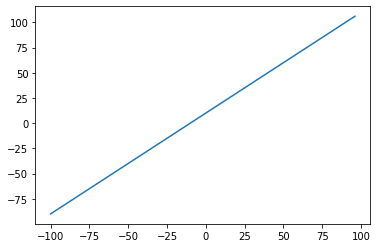

In [48]:
# Visualize the data
import matplotlib.pyplot as plt

plt.plot(X, y)

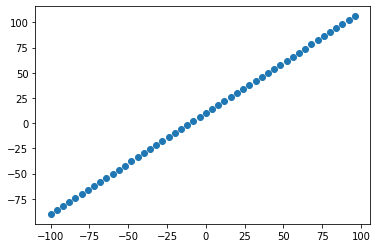

In [49]:
plt.scatter(X, y)

In [ ]:
### The 3 sets...